<a href="https://colab.research.google.com/github/Shirohige7/ANN_MNIST/blob/master/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
mnist = tf.keras.datasets.mnist
#loading mnist dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data() #load the training and testing data
x_train, x_test = x_train / 255.0, x_test / 255.0 #dividing with 255 to get values ranging from 0-1 as now the values are 0-255 [black and white]
print('x_train.shape:', x_train.shape) #shape of the training data(num of samples, height, width)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]), #flattens the images in an 1D array of 784
    tf.keras.layers.Dense(128, activation='relu'), #fully connected hidden layer with 128 neurons that activates the relu function
    tf.keras.layers.Dropout(0.2), #drops random neurons during trainning to reduce overfitting
    tf.keras.layers.Dense(10, activation = 'softmax') #outpout layer with 10 neurons (0-9 digits) ,softmax activation
])

In [ ]:
model.compile(optimizer='adam', #compiling the model using standard adam optimizer
              loss='sparse_categorical_crossentropy', #loss function
              metrics=['accuracy']) #evaluation metrics: measures the fraction of correctly classified samples

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10) #train the model

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2954 - accuracy: 0.9157 - val_loss: 0.1393 - val_accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1435 - accuracy: 0.9577 - val_loss: 0.1101 - val_accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1100 - accuracy: 0.9668 - val_loss: 0.0979 - val_accuracy: 0.9708
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0887 - accuracy: 0.9722 - val_loss: 0.0810 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0772 - accuracy: 0.9756 - val_loss: 0.0766 - val_accuracy: 0.9752
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0654 - accuracy: 0.9788 - val_loss: 0.0708 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0593 - accuracy: 0.9806 - val_loss: 0.0702 - val_accura

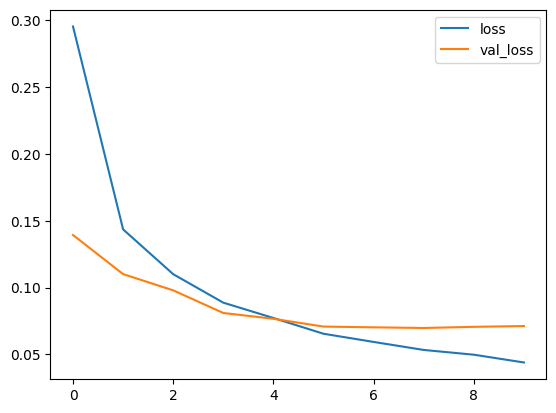

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss') #training loss over the epochs
plt.plot(r.history['val_loss'], label = 'val_loss') #validation loss over the epochs
plt.legend()

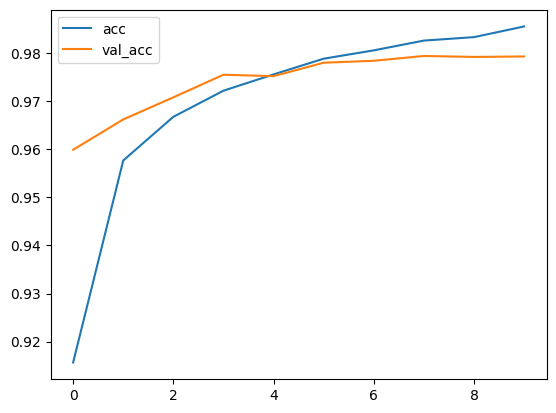

In [ ]:
plt.plot(r.history['accuracy'], label='acc') #training accuracy over the epochs
plt.plot(r.history['val_accuracy'], label='val_acc') #validation accuracy over the epochs
plt.legend()

In [ ]:
print(model.evaluate(x_test,y_test)) #evaluates the model ,outpout is test loss and test accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9793
[0.07118506729602814, 0.9793000221252441]


313/313 [==============================] - 1s 2ms/step
confusion matrix, without normalization
[[ 966    0    2    1    1    1    2    2    2    3]
 [   0 1126    3    1    0    1    2    0    2    0]
 [   3    2 1011    2    2    0    2    6    3    1]
 [   0    0    3  990    0    4    0    4    5    4]
 [   1    0    2    0  967    0    5    1    2    4]
 [   2    2    0   10    1  868    4    0    4    1]
 [   5    2    0    1    3    4  942    1    0    0]
 [   1    4    9    0    3    0    0 1005    1    5]
 [   5    0    1    6    6    4    1    3  946    2]
 [   2    5    0    5   14    4    0    6    1  972]]


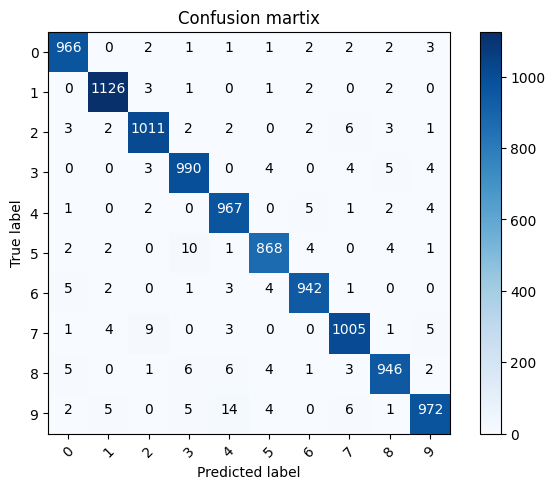

In [ ]:
# confusion matrix that outpouts the true label and the predicted label
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion martix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j], fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


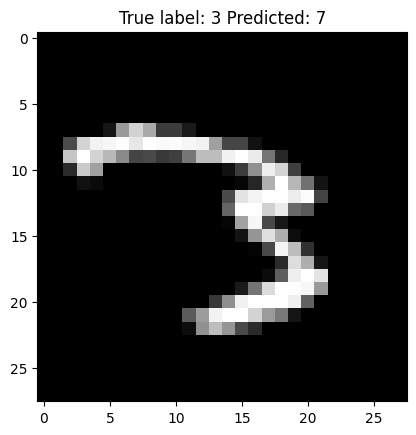

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (y_test[i], p_test[i]));
#examples of true labels matched wrong